## This notebook is to clean the data 
the data source: https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml

In [1]:
### Data handling imports
import pandas as pd
import numpy as np

### Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Advanced plotting... Plotly
from plotly import tools
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# Statistics imports
import scipy, scipy.stats

# df.head() displays all the columns without truncating
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [2]:
def ploy_bar(data, ax, xlabel=None, ylabel=None, title=None, int_text=False):
    
    # Plots the data
    fig = sns.barplot(data.values, data.index, ax=ax)
    plt.setp(fig.get_xticklabels(), rotation=45)
    # Places text for each value in data
    for i, v in enumerate(data.values):
        
        # Decides whether the text should be rounded or left as floats
        if int_text:
            ax.text(0, i, int(v), fontsize=14)
        else:
            ax.text(0, i, round(v, 3), fontsize=14)
    
    ### Labels plot
    ylabel != None and fig.set(ylabel=ylabel)
    xlabel != None and fig.set(xlabel=xlabel)
    title != None and fig.set(title=title)

    

In [3]:
county = pd.read_csv("./data/acs2017_census_tract_data.csv")
tract = pd.read_csv("./data/acs2017_county_data.csv")

#### About the tract data, one or many tractk make up a county. while on tract may not span multiple counties, so we took the tracts a primary dataset

In [5]:
# remove all the row with zero population
print("Oringal length:", len(tract))
tract = tract.drop(tract[tract.TotalPop == 0].index)
print("Oringal length:", len(tract))
print("Shape of tract", tract.shape)
print("Columns", tract.columns)
tract.head()

Oringal length: 3220
Oringal length: 3220
Shape of tract (3220, 37)
Columns Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')


,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0,20269,33368,2551,17561,798,27.2,44.9,25.0,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0,17662,43404,3431,20911,1889,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,42513,47412,2630,22021,850,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [6]:
print("Oringal length:", len(county))
county = county.drop(county[county.TotalPop == 0].index)
print("Oringal length:", len(county))
print("Shape of county", county.shape)
print("Columns", county.columns)
county.head()

Oringal length: 74001
Oringal length: 73305
Shape of county (73305, 37)
Columns Index(['TractId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')


,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,1407,67826.0,14560.0,33018.0,6294.0,10.7,20.8,38.5,15.6,22.8,10.8,12.4,94.2,3.3,0.0,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,1652,41287.0,3819.0,18996.0,2453.0,22.4,35.8,30.5,24.9,22.9,6.3,15.4,90.5,9.1,0.0,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,2480,46806.0,9496.0,21236.0,2562.0,14.7,21.1,27.9,19.4,33.3,9.9,9.6,88.3,8.4,0.0,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,3257,55895.0,4369.0,28068.0,3190.0,2.3,1.7,29.0,16.6,25.8,9.1,19.5,82.3,11.2,0.0,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,7229,68143.0,14424.0,36905.0,10706.0,12.2,17.9,48.8,13.8,20.5,3.5,13.4,86.9,11.2,0.0,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [7]:
max_tract = tract.reindex([np.argmax(tract.TotalPop)])

The most populated Tract is: 204    Los Angeles County
Name: County, dtype: object, 204    California
Name: State, dtype: object with a population of: 10105722 people
The least populated Tract is: 2673    Loving County
Name: County, dtype: object, 2673    Texas
Name: State, dtype: object  with a population of: 74 people
The median number of people sampled in a Tract is: 25847


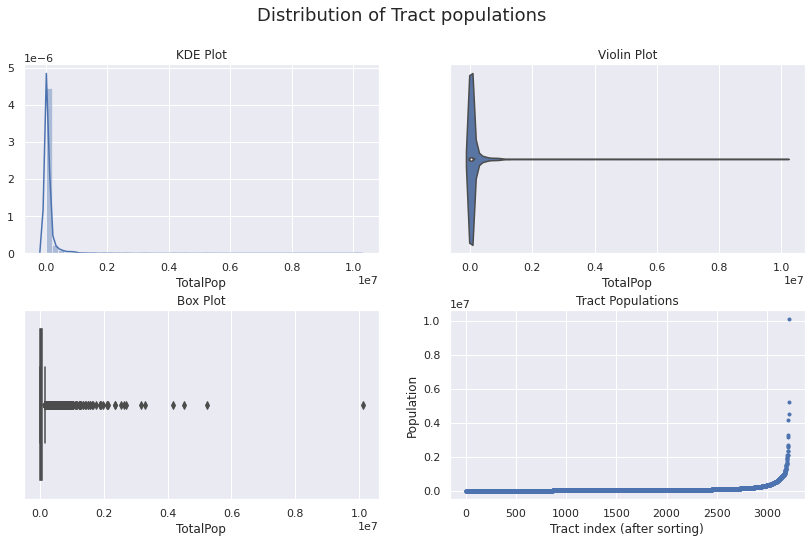

In [8]:
# The distribution of tract
max_tract = tract.reindex([np.argmax(tract.TotalPop)])[["State", "County"]]
min_tract = tract.reindex([np.argmin(tract.TotalPop)])[["State", "County"]]

print("The most populated Tract is: {}{}, {}{}".format(color.BOLD, max_tract.County, max_tract.State, color.END),
      "with a population of: {}{}{} people".format(color.BOLD, max(tract.TotalPop), color.END))
print("The least populated Tract is: {}{}, {}{} ".format(color.BOLD, min_tract.County, min_tract.State, color.END),
      "with a population of: {}{}{} people".format(color.BOLD, min(tract.TotalPop), color.END))
print("The median number of people sampled in a Tract is: {}{}{}".format(color.BOLD, int(tract.TotalPop.median()), color.END))

### Plotting the different distributions
fig, axarr = plt.subplots(2, 2, figsize=(14, 8))
fig.subplots_adjust(hspace=0.3)
fig.suptitle("Distribution of Tract populations", fontsize=18)

sns.distplot(tract.TotalPop, ax=axarr[0][0]).set(title="KDE Plot")
sns.violinplot(tract.TotalPop, ax=axarr[0][1]).set(title="Violin Plot")
sns.boxplot(tract.TotalPop, ax=axarr[1][0]).set(title="Box Plot")
sorted_data = tract.TotalPop.sort_values().reset_index().drop("index", axis=1)
axarr[1][1].plot(sorted_data, ".")
axarr[1][1].set_title("Tract Populations")
axarr[1][1].set_xlabel("Tract index (after sorting)")
axarr[1][1].set_ylabel("Population")
del sorted_data, min_tract, max_tract

### Handle the missing value of tract and county

In [9]:
missing_cols = [col for col in tract.columns if any(tract[col].isnull())]
print(tract[missing_cols].isnull().sum())

# Look at rows with missing values
tract[tract.isnull().any(axis=1)]

ChildPoverty    1
dtype: int64


,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
548,15005,Hawaii,Kalawao County,86,41,45,4.7,20.9,0.0,0.0,29.1,33.7,84,61750,11280,46024,7959,12.7,NaN,22.2,38.1,20.6,0.0,19.0,32.8,9.4,0.0,40.6,10.9,6.3,6.6,63,34.9,61.9,3.2,0.0,0.0


In [10]:
# then just remove the hawaii cuz we don't colelct the twitter data of hawaii
county = county[county.notnull().all(axis=1)]
county.shape

(72718, 37)

In [49]:
missing_cols = [col for col in county.columns if any(county[col].isnull())]
print(county[missing_cols].isnull().sum())

# Look at rows with missing values
county[county.isnull().any(axis=1)]

Income             420
IncomeErr          420
IncomePerCap        49
IncomePerCapErr     49
Poverty            146
ChildPoverty       414
Professional       115
Service            115
Office             115
Construction       115
Production         115
Drive              105
Carpool            105
Transit            105
Walk               105
OtherTransp        105
WorkAtHome         105
MeanCommute        250
PrivateWork        115
PublicWork         115
SelfEmployed       115
FamilyWork         115
Unemployment       114
dtype: int64


,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
106,1015981901,Alabama,Calhoun County,8,4,4,0.0,100.0,0.0,0.0,0.0,0.0,8,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
805,1097003605,Alabama,Mobile County,757,208,549,2.9,66.4,25.1,0.0,0.5,0.0,732,NaN,NaN,2569.0,369.0,NaN,NaN,23.5,21.2,43.5,4.6,7.3,27.2,13.4,6.1,37.4,1.2,14.6,13.7,260,79.2,11.9,4.2,4.6,16.9
1124,1125011200,Alabama,Tuscaloosa County,7307,3454,3853,2.1,82.1,10.2,0.3,2.9,0.3,7004,25833.0,5071.0,5632.0,608.0,16.7,NaN,33.6,30.4,33.7,1.0,1.3,42.2,1.8,1.9,22.5,6.5,25.0,12.5,1148,47.0,51.0,2.0,0.0,31.2
1326,2185000300,Alaska,North Slope Borough,2783,2267,516,3.5,80.6,1.0,10.0,2.3,0.2,2750,NaN,NaN,99450.0,10698.0,1.8,NaN,31.2,13.9,10.7,24.9,19.3,9.5,7.9,6.8,74.1,0.4,1.3,6.3,2772,99.7,0.3,0.0,0.0,0.1
1466,4013040506,Arizona,Maricopa County,5404,2401,3003,0.3,97.9,0.5,0.0,0.0,0.0,5226,40978.0,7396.0,33293.0,4986.0,8.2,NaN,41.4,16.1,35.0,2.8,4.7,78.7,3.5,0.0,1.9,4.1,11.9,23.2,859,80.8,4.8,14.4,0.0,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73774,72127004800,Puerto Rico,San Juan Municipio,3092,1582,1510,99.5,0.5,0.0,0.0,0.0,0.0,2045,NaN,NaN,2214.0,695.0,91.3,98.1,6.5,50.8,23.1,19.5,0.0,42.7,0.0,26.7,12.1,18.6,0.0,30.4,307,75.2,21.2,3.6,0.0,63.1
73787,72127005402,Puerto Rico,San Juan Municipio,1738,778,960,100.0,0.0,0.0,0.0,0.0,0.0,885,NaN,NaN,3209.0,1750.0,88.2,93.4,7.2,42.6,34.9,0.0,15.4,16.9,19.0,32.8,28.2,3.1,0.0,32.4,195,62.1,25.6,12.3,0.0,55.6
73853,72127980000,Puerto Rico,San Juan Municipio,23,16,7,100.0,0.0,0.0,0.0,0.0,0.0,23,NaN,NaN,NaN,NaN,100.0,NaN,0.0,53.3,46.7,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,NaN,15,46.7,0.0,53.3,0.0,34.8
73856,72127980103,Puerto Rico,San Juan Municipio,1596,534,1062,100.0,0.0,0.0,0.0,0.0,0.0,867,NaN,NaN,2152.0,740.0,93.4,100.0,14.7,22.7,49.7,5.5,7.4,57.1,8.0,0.0,28.8,6.1,0.0,21.3,163,76.7,17.8,5.5,0.0,53.8


In [12]:
tract = tract[tract.notnull().all(axis=1)]
tract.shape

(3219, 37)

In [13]:
tract.to_csv("processed_county.csv", index=False)

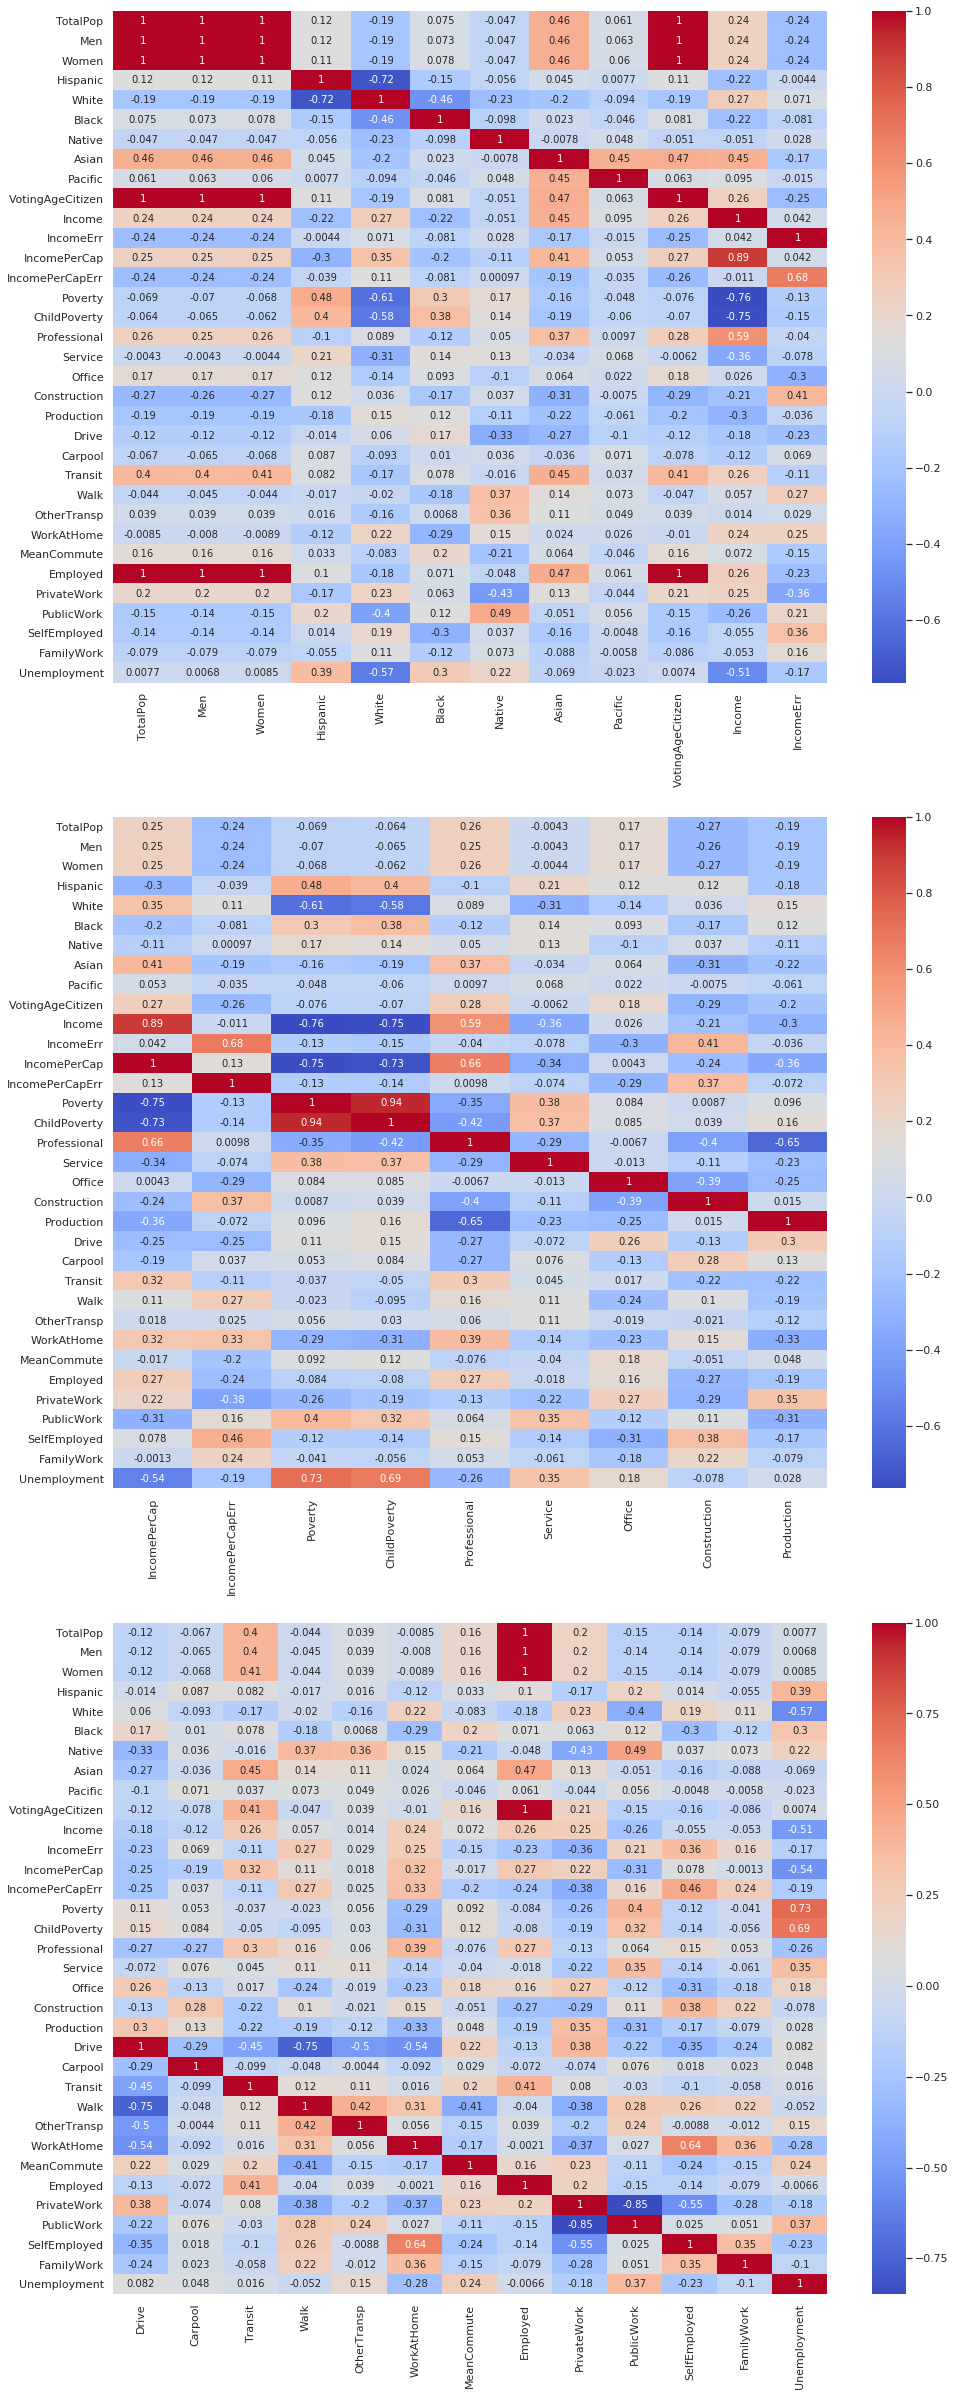

In [38]:
# Correlation Map
fig, axarr = plt.subplots(3, 1, figsize=(16, 42))
data = tract.drop("CountyId", axis=1).corr()

sns.heatmap(data.head(12).transpose(), annot=True, cmap="coolwarm", ax=axarr[0])
sns.heatmap(data.iloc[12:21].transpose(), annot=True, cmap="coolwarm", ax=axarr[1])
sns.heatmap(data.tail(13).transpose(), annot=True, cmap="coolwarm", ax=axarr[2])
del data

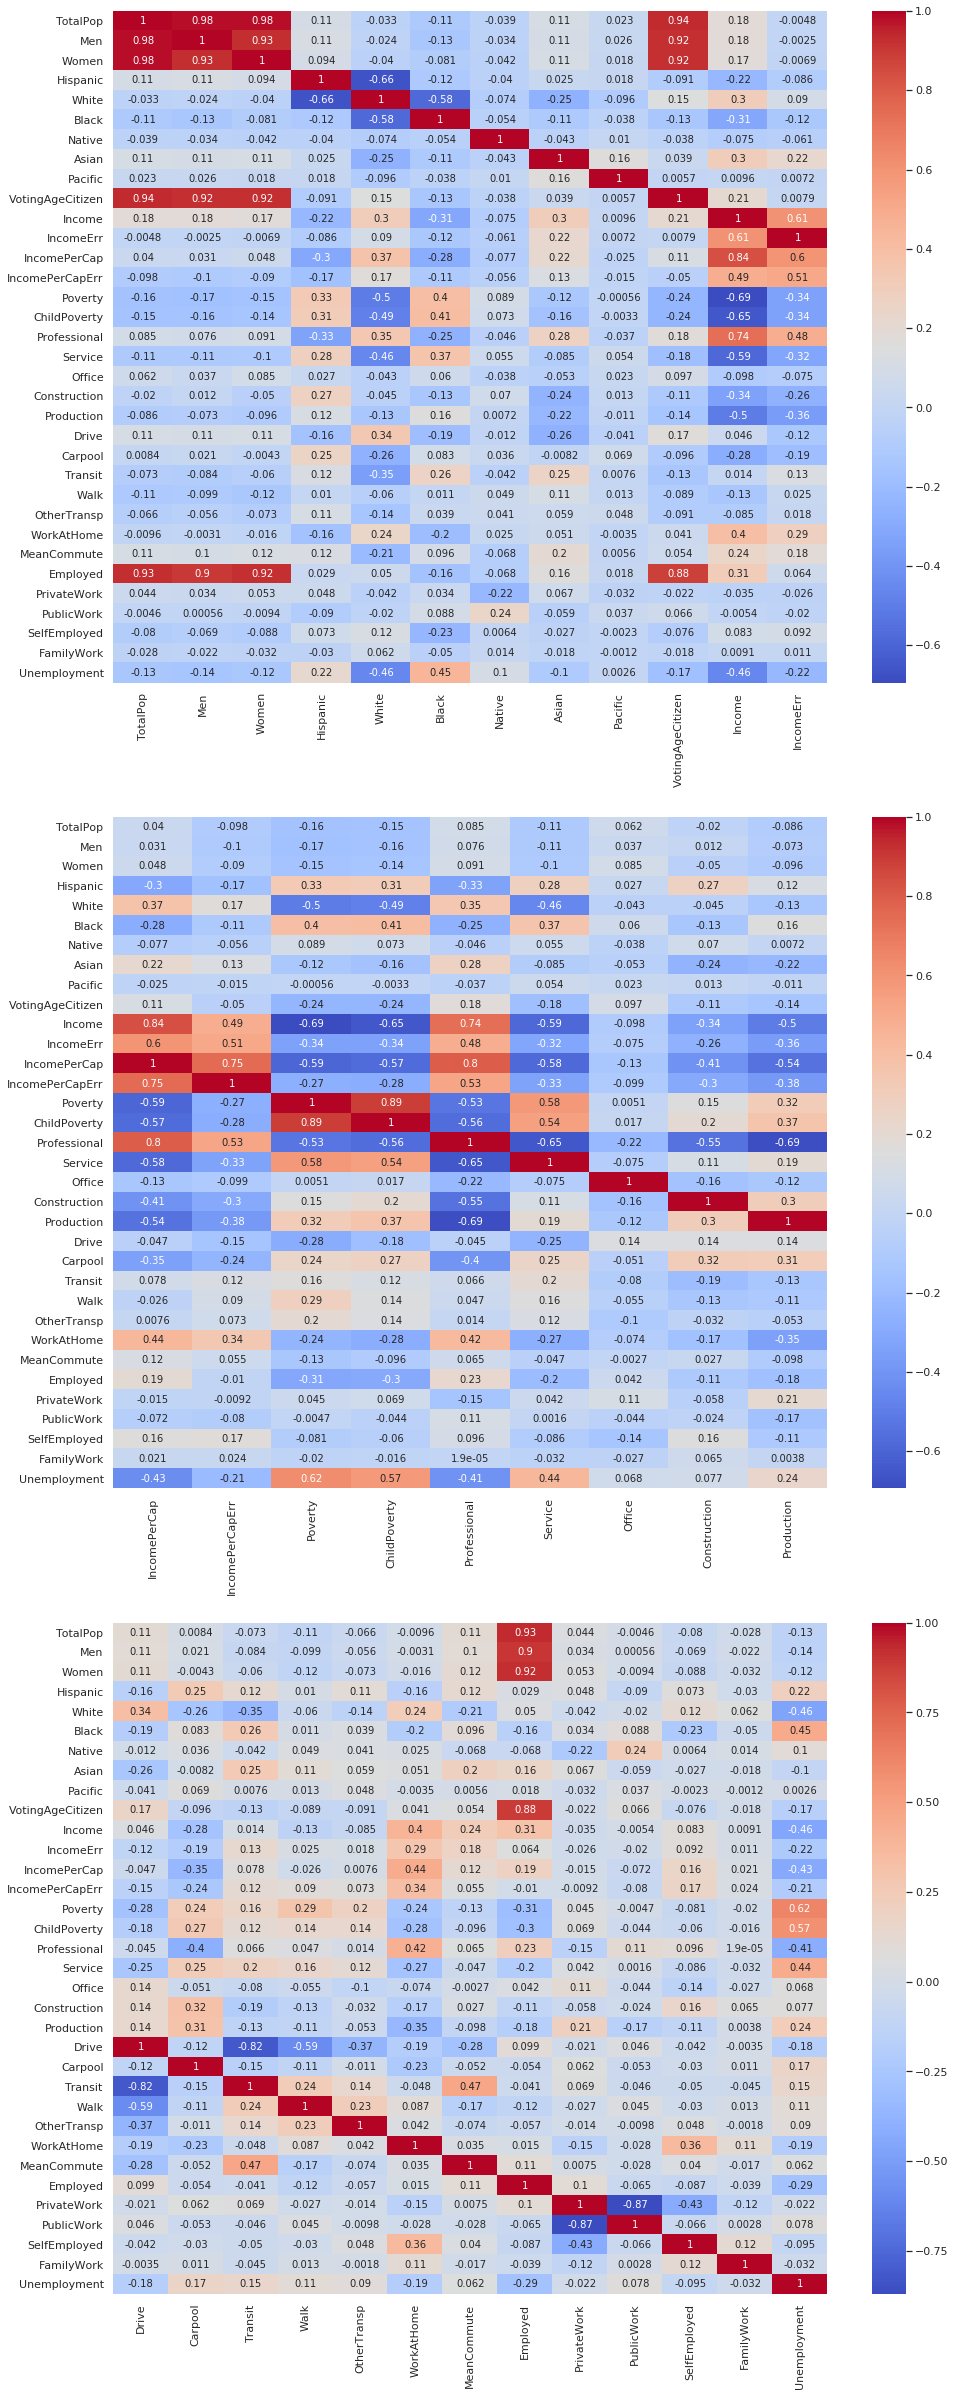

In [39]:
## just see what if we use county data to plot the statistic
# Correlation Map
fig, axarr = plt.subplots(3, 1, figsize=(16, 42))
data = county.drop("TractId", axis=1).corr()

sns.heatmap(data.head(12).transpose(), annot=True, cmap="coolwarm", ax=axarr[0])
sns.heatmap(data.iloc[12:21].transpose(), annot=True, cmap="coolwarm", ax=axarr[1])
sns.heatmap(data.tail(13).transpose(), annot=True, cmap="coolwarm", ax=axarr[2])
del data

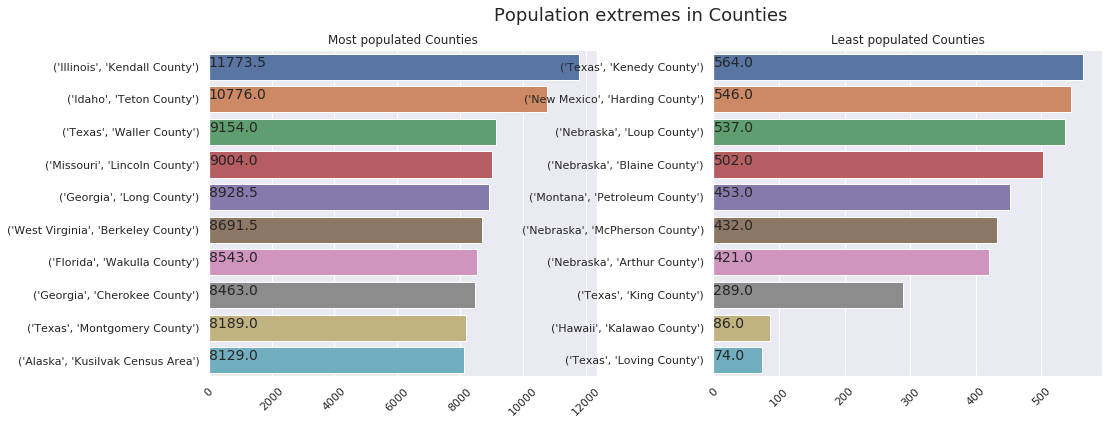

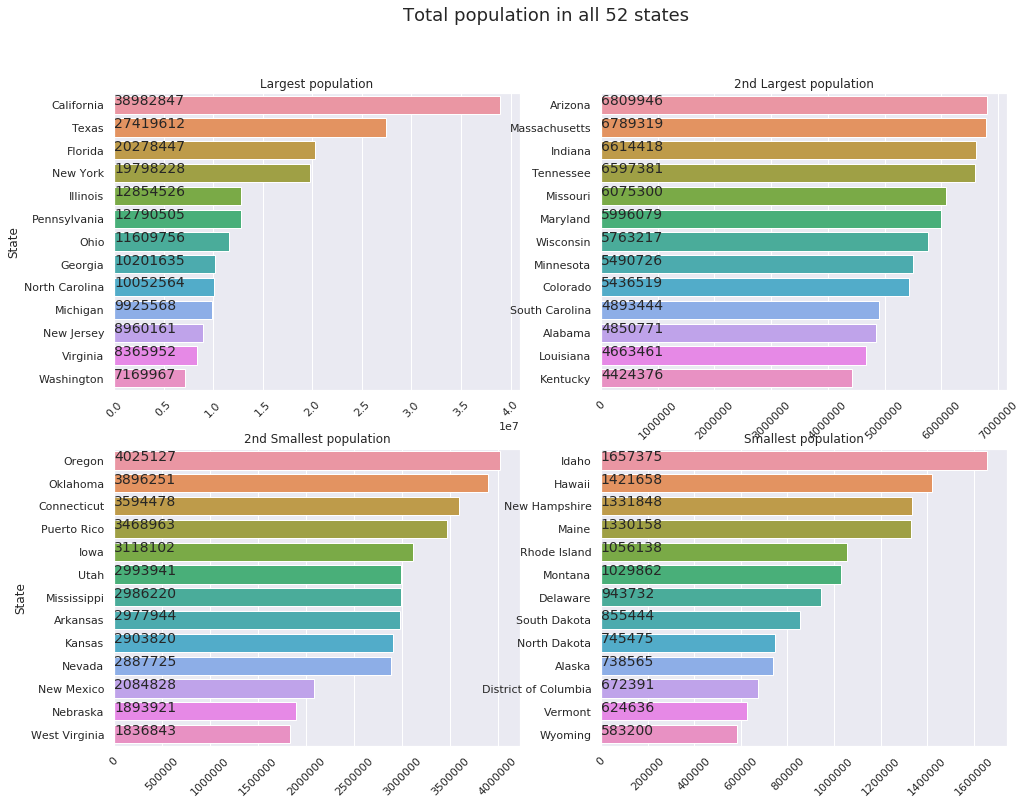

In [47]:
##### County Plots

fig, axarr = plt.subplots(1, 2, figsize=(16,6))
fig.subplots_adjust(wspace=0.3)
fig.suptitle("Population extremes in Counties", fontsize=18)

county_pop = county.groupby(["State", "County"]).TotalPop.median().sort_values(ascending=False)

ploy_bar(county_pop.head(10), axarr[0], title="Most populated Counties")
ploy_bar(county_pop.tail(10), axarr[1], title="Least populated Counties")
plt.show()

##### State Plots

fig, axarr = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Total population in all 52 states", fontsize=18)

state_pops = county.groupby("State")["TotalPop"].sum().sort_values(ascending=False)

ploy_bar(state_pops.head(13), axarr[0][0], title="Largest population")
ploy_bar(state_pops.iloc[13:26], axarr[0][1], title="2nd Largest population", ylabel="")
ploy_bar(state_pops.iloc[26:39], axarr[1][0], title="2nd Smallest population")
ploy_bar(state_pops.tail(13), axarr[1][1], title="Smallest population", ylabel="")

del county_pop, state_pops

In [57]:
# Transpotation 
transportations = ['Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp']

datas = []
for tran in transportations:
    datas.append(tract.groupby(["State", "County"])[tran].median().sort_values(ascending=False).head(10))

traces = []

for data in datas:
    traces.append(go.Box(
                            x=data.index,
                            y=data.values, 
                            showlegend=False
                        ))
buttons = []

for i, tran in enumerate(transportations):
    visibility = [i==j for j in range(len(transportations))]
    button = dict(
                 label =  tran,
                 method = 'update',
                 args = [{'visible': visibility},
                     {'title': 'Top counties for {}'.format(tran)}])
    buttons.append(button)

updatemenus = list([
    dict(active=-1,
         x=-0.15,
         buttons=buttons
    )
])

layout = dict(title='Counties with most popular transportation methods', 
              showlegend=False,
              updatemenus=updatemenus)

fig = dict(data=traces, layout=layout)
iplot(fig, filename='dropdown')

In [54]:
for i in fig:
    iplot(fig)

In [ ]:
## Commute time 